# Support vector regression
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

## Imports

In [1]:
from utils_hasse import *
from sklearn.svm import SVR

## Extra functions

## Import Data

In [2]:
X_train, X_test, y_train, y_test = load_and_handle_train(split_before_handle = True)

C:\ntnuProjects\TDT4173-ML\hasse-testsite\utils_hasse.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[feature] = le.fit_transform(data[feature])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\ntnuProjects\TDT4173-ML\hasse-testsite\utils_hasse.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

## Prepare model

### Default configuration

In [3]:
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

### Scale Data

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)

In [5]:
rbf_regressor = svr_rbf.fit(X_train,y_train)

In [6]:
poly_regressor = svr_poly.fit(X_train,y_train)

In [7]:
lin_regressor = svr_lin.fit(X_train,y_train)

In [8]:
rbf = rbf_regressor.predict(X_test)

In [9]:
poly = poly_regressor.predict(X_test)

In [10]:
lin = lin_regressor.predict(X_test)

In [11]:
rbf_msle = root_mean_squared_log_error(rbf, y_test)
print('RBF MSLE:', rbf_msle)

RBF MSLE: 0.8873730041998729


In [12]:
poly_msle = root_mean_squared_log_error(poly, y_test)
print('Polynomial MSLE:', poly_msle)

Polynomial MSLE: 0.887365659487154


In [13]:
lin_msle = root_mean_squared_log_error(lin, y_test)
print('Linear MSLE:', lin_msle)

Linear MSLE: 0.4533829312894586


In [16]:
print(svr_lin.coef_)

[[-1.61389623e+01 -2.86924093e+02  2.13307886e+05  7.07860037e+03
   4.99102378e+04  1.73004250e+04  5.75938549e+02  6.00000000e+01
   1.13811359e+03  3.74884547e+03 -1.54238467e+03 -2.19280879e+02
   1.01280879e+02 -3.62016684e+02  1.08632014e+02  1.85202351e+03
   3.41833192e+02  1.33562734e+01 -1.11200919e+02  2.54026550e+02
  -1.55376993e+02 -1.17947147e+04 -3.03775432e+02 -7.12658534e+02
  -2.66676999e+03 -3.24976960e+03  2.53101653e+04  1.20231751e+03
   1.34000000e+02 -4.10871071e+01 -2.44019629e+03 -3.25000000e+02
   9.00000000e+01 -9.08249317e+02  1.24662305e+03  2.44488675e+02
  -1.20000000e+02  1.35895950e+02 -1.22000000e+02 -8.70000000e+01
   1.36895950e+02 -1.20000000e+02 -3.00000000e+01  5.16230402e+02
  -2.20000000e+01]]


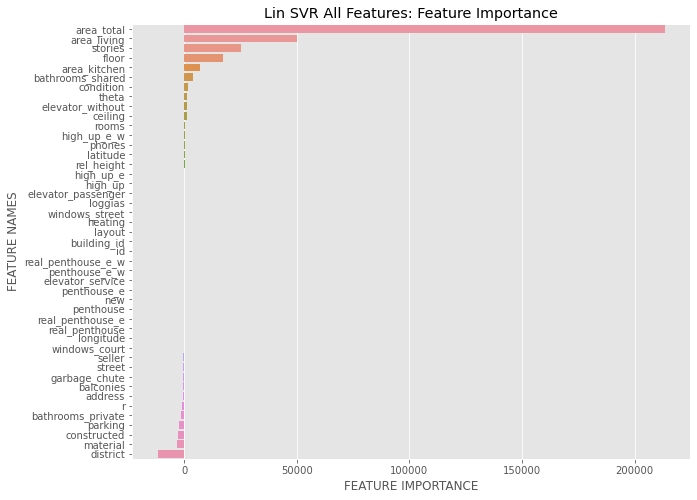

In [19]:
lin_svr_importance = svr_lin.coef_[0]
plot_feature_importance(lin_svr_importance, list(X_train.columns), 'Lin SVR All Features: ')